# Who survived in Titanic? 

## 1. Introduction

In this report, I am exploring what types of passengers are more likely to survive in Titanic based on the data provided by Kaggle. 

## 2. Analysis

Date import and cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('D:/Dropbox/Data-Analysis/p2/titanic-data.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To have a general idea of the difference between survived and nonsurvived, I group the data by "Survived" column

In [2]:
titanic_df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


It seems Pclass, Age, SibSp, Parch, Fare have different mean values between survived and nonsurvived. I will later investigate each of these factors.

In [3]:
population = 2224
total_non_survival = 1502
total_survival = population - total_non_survival
sample_non_survival = titanic_df.groupby('Survived')['Survived'].count()[0]
sample_survival = titanic_df.groupby('Survived')['Survived'].count()[1]
sample = titanic_df['PassengerId'].count()
missing_data = population - sample
print 'Number of total passengers:',population
print 'Number of total non-survive passengers:',total_non_survival
print 'Number of total survive passengers:',total_survival
print 'Non survival proportion in population:',1.0*total_non_survival/population
print ''
print 'Number of sample passengers',sample
print 'Number of sample non-survive passengers:',sample_non_survival
print 'Number of sample survive passengers:',sample_survival
print 'Non survival proportion in sample:',1.0*sample_non_survival/sample
print ''
print 'Missing data number of passengers', missing_data
print 'Missing data number of non-survived passengers:',total_non_survival - sample_non_survival
print 'Missing data number of survived passengers:', total_survival-sample_survival
print 'Non survival proportion in missing data:',1.0*(total_non_survival - sample_non_survival)/missing_data


Number of total passengers: 2224
Number of total non-survive passengers: 1502
Number of total survive passengers: 722
Non survival proportion in population: 0.67535971223

Number of sample passengers 891
Number of sample non-survive passengers: 549
Number of sample survive passengers: 342
Non survival proportion in sample: 0.616161616162

Missing data number of passengers 1333
Missing data number of non-survived passengers: 953
Missing data number of survived passengers: 380
Non survival proportion in missing data: 0.714928732183


It is known that 1502 out of 2224 passengers on Titanic didn't survived. Here we have 891 passengers data available, 1333 passengers data not available, about 60% of all passengers. This lack of information of other passengers is probably related to how the data was collected, which may not be randomly selected. Thus this sample may not represent the population statistics. 

In addition, the proportion of non survival passengers in the missing data is higher (0.71) than population (0.67). This may be related to the fact that it was more difficult to collect data from dead passengers who was sinking to the bottom of the ocean. Therefore, it suggests that the sample population may be biased towards survivors, so called survival bias. 

In [4]:
numbers = titanic_df.count()
print numbers

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


From the count results, the numbers of Age, Cabin, and Embarked are smaller than the number of Passengers data here (which is 891). This suggests that there are missing values for these 3 columns. In later analysis, when using the data from these three fields, I will first remove the missing values and then do further analysis. 

First, I will investigate how age was correlated with survival. Since it seems that the total count of age is smaller than the number of passengers, indicating missing values, I will first print out one sample of missing age and then drop passengers whose age data is missing. Notice that after cleaning missing values for age column, some passengers don't have Cabin or Embarked information. Since I'm not going to research Cabin and Embarked information in this study, I will only drop NaN for Age column. 

In [5]:
N = titanic_df['PassengerId'].count()

i = 0
while i < N:
    if pd.isnull(titanic_df['Age'][i]):
        print 'A passenger without Age information'
        print ''
        print titanic_df.iloc[i]
        break
    i = i + 1 

A passenger without Age information

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object


In [6]:
missing_survival = titanic_df[titanic_df['Age'].isnull()]
missing_survival_s = missing_survival['Survived']

print "total missing age numebr: ", missing_survival_s.count()
print "proportion of passengers with missing age information who survived and who didn't:"
print missing_survival_s.value_counts(1,ascending=True)

total missing age numebr:  177
proportion of passengers with missing age information who survived and who didn't:
1    0.293785
0    0.706215
Name: Survived, dtype: float64


Of missing age passengers 70% didn't survive. This may explain the reason of missing age information because if a passenger didn't survive and body not found later, it would be impossible to identify his/her age. 

Of missing age passengers, 30% eventually survived. This may be due to mistakes during data collection, some passengers refused to declare their age, or couldn't identify their birth year. 

In [7]:
agesex_df = titanic_df.dropna(subset = ['Age'])
agesex_df.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       712
dtype: int64

In [8]:
print "Before dropna Age count =", titanic_df['Age'].count()
print "After dropna Age count =", agesex_df['Age'].count()
print "Before dropna Total Passengers =", titanic_df['PassengerId'].count()
print "After dropna Total Passengers =", agesex_df['PassengerId'].count()

Before dropna Age count = 714
After dropna Age count = 714
Before dropna Total Passengers = 891
After dropna Total Passengers = 714


Pandas count() before dropping missing values only counts valid data, ignores NaN values. So count by 'Age' column before dropna is same as after dropna while total numebr of passengers drops from 891 to 714. 

In [9]:
print "Percentage of missing age =", (1.0 - 1.0*agesex_df['Age'].count()/titanic_df['PassengerId'].count())*100, "%"

Percentage of missing age = 19.8653198653 %


I dropped 20% of all available passenger information by missing values in age, and this is quite a substantial amount of data being dropped. And given there were 2224 passengers in total on Titanic, the sample here was 714, 30% of the population. The conclusion drawn from the sample may not be accurate depending how the sample was collected. 

In [10]:
agesex_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now I am going to investigate the survival rate for each age group. 

In [11]:
non_survived_df = agesex_df[agesex_df['Survived'] == 0]
survived_df = agesex_df[agesex_df['Survived'] == 1]

In [12]:
def plot_survived(df,is_survival):
    df.hist(column = 'Age',bins = 10, range = (0,80))
    title = 'Age distribution of' + is_survival + ' passengers'
    plt.title(title)
    plt.xlabel('Age(Years)')
    plt.ylabel('Count')
    plt.ylim((0,120))

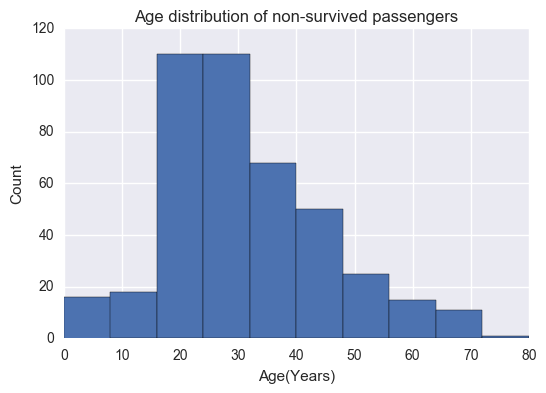

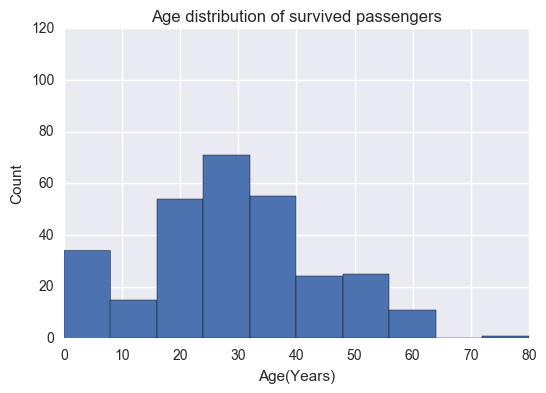

In [13]:
plot_survived(non_survived_df,' non-survived')
plot_survived(survived_df,' survived')

It seems non-survived passengers tend to have a older age distribution.To better understand this, I will investigate the survival rate for each age group given the wide range distribution. 

In [14]:
bins= np.array([0,10,20,30,40,50,60,70,80])
age_bins = pd.cut(agesex_df['Age'], bins) # Return indices of half-open bins to which each value of x belongs.
agesex_df.groupby(age_bins).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,,
"(0, 10]",64,64,64,64,64,64,64,64,64,64,10,64
"(10, 20]",115,115,115,115,115,115,115,115,115,115,19,115
"(20, 30]",230,230,230,230,230,230,230,230,230,230,40,230
"(30, 40]",155,155,155,155,155,155,155,155,155,155,50,154
"(40, 50]",86,86,86,86,86,86,86,86,86,86,33,86
"(50, 60]",42,42,42,42,42,42,42,42,42,42,22,42
"(60, 70]",17,17,17,17,17,17,17,17,17,17,9,16
"(70, 80]",5,5,5,5,5,5,5,5,5,5,2,5


In [15]:
counts = agesex_df.groupby(age_bins)['PassengerId'].count()
print counts

Age
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64


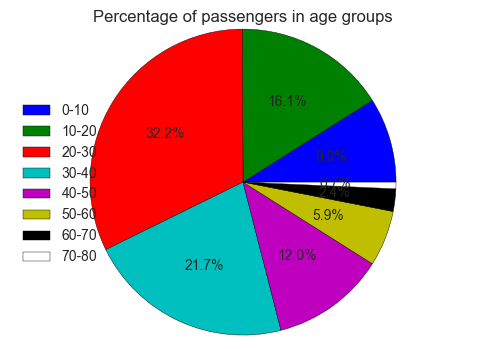

In [16]:
plt.pie(counts, autopct='%1.1f%%')

plt.axis('equal')
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
plt.legend(labels, loc=6)
plt.title('Percentage of passengers in age groups')

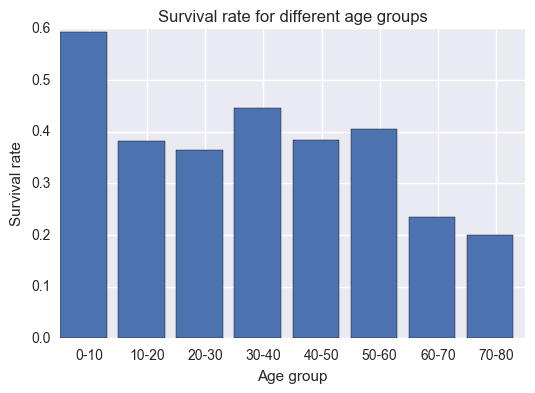

In [17]:
n_groups = 8
index = np.arange(n_groups)

means = agesex_df.groupby(age_bins)['Survived'].mean()
plt.bar(index, means)

bar_width = 0.5

labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
plt.xticks(index + bar_width, labels)

plt.title('Survival rate for different age groups')
plt.xlabel('Age group')
plt.ylabel('Survival rate')

So it seems people age 0-10 years old, namely children, have the highest survival rate, about 60%. Old people (age 60+) have the lowest survival rate about 20%.

The reasons why old people have the lowest survival rate may be
1) old people are not physically flexible and strong as younger people, thus may not be able to rescue themselves in the havoc of sinking
2) old people may sacrifice themselves to save other people.

The reasons why children have the highest survival rate may be
1) people think children are the future and hope, and tend to prioritize and save children first
2) children are lighter in weight and smaller in size, thus more children can be fit in a lifeboat
3) i notice that Parch column the average number of parents on board is the highest for children. if a child travels with his/her parent, it is more likely that this child will be saved by the parent. 

([<matplotlib.axis.XTick at 0xcb0f4e0>,
 <a list of 3 Text xticklabel objects>)

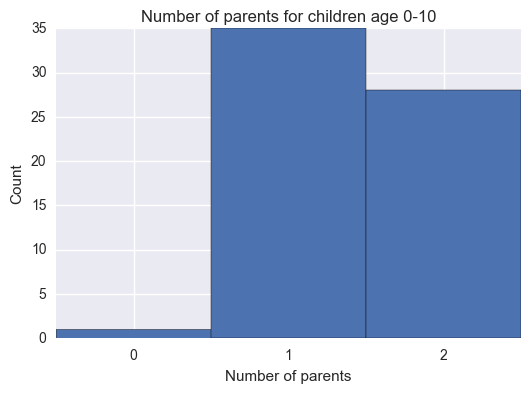

In [18]:
children_df = agesex_df[agesex_df['Age'] <= 10]
number_of_children = children_df['PassengerId'].count()
children_df['Parch'].hist(bins=np.arange(4) - 0.5) # align x tick to the center
plt.title('Number of parents for children age 0-10')
plt.xlabel('Number of parents')
plt.ylabel('Count')
plt.xticks(range(3))

As we can see, most children have 1 or 2 parents traveling together, only one child doesn't. This child may travel with someone other relatives or friends, or the parent information is missing. Next I wonder if the number of parents or siblings is related to the survival rate of children.

In [19]:
children_df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,391.153846,2.923077,5.423077,3.192308,1.538462,34.479165
1,458.000000,2.447368,3.478158,0.921053,1.342105,27.666995


Non-survived children have a much higher number of siblings. This may be because when there are many siblings, a single child may not get as much attention and care as those with fewer siblings. 
The average number of parents do not differ in survived and nonsurvived group, because almost all children traveled with parents. 

While there is not much different in survival rate from age 10-60, I wonder whether male or female have a higher survival rate for passengers age 20-60, namely adults. Passengers age 10-20 are teenagers, which I will not include in this analysis. Passengers older than 60 have much lower survival rate than other age groups and are not not included in the adult dataset. 

In [20]:
adult_df20 = agesex_df[agesex_df['Age'] > 20]
adult_df = adult_df20[adult_df20['Age'] <=60] # age 20-60
number_of_adult = adult_df['PassengerId'].count()
print number_of_adult

513


In [21]:
female_df = adult_df[adult_df['Sex']=='female']
male_df = adult_df[adult_df['Sex']=='male']
assert number_of_adult == female_df['PassengerId'].count() + male_df['PassengerId'].count()

([<matplotlib.axis.XTick at 0xc7de048>, <matplotlib.axis.XTick at 0xccb8550>],
 <a list of 2 Text xticklabel objects>)

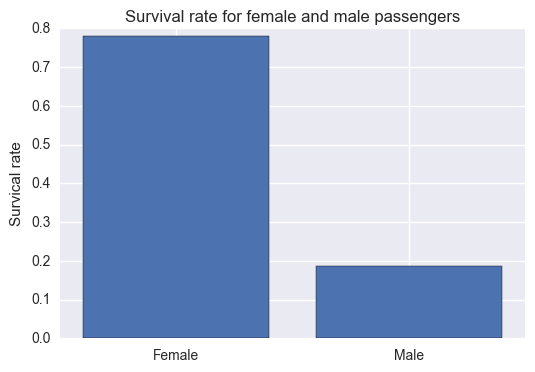

In [22]:
y = adult_df.groupby('Sex')['Survived'].mean()

plt.bar((1,2),y,align='center')

plt.title('Survival rate for female and male passengers')
plt.ylabel('Survical rate')
my_xticks = ('Female','Male')
plt.xticks((1,2),my_xticks)

So far, it seems that females passengers tend to have a higher survival rate (about 0.8) than male (about 0.2). From the titanic_df mean value, it seems that people who survived had a higher socio-economic status, indicated by higher Fare and high class (low Pclass value). Here I will focus on the age group 20-60 to better understand sex, class and survival rate

In [23]:
adult_df.groupby('Pclass')['Survived'].count()

Pclass
1    151
2    135
3    227
Name: Survived, dtype: int64

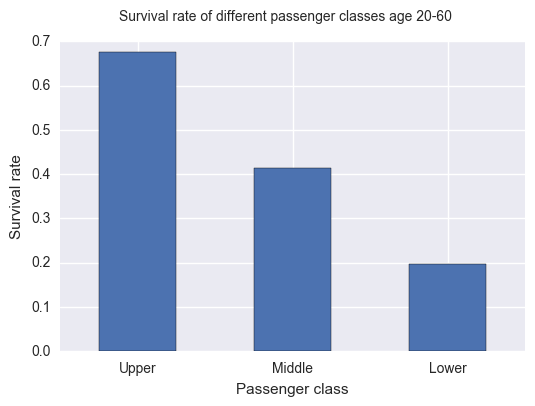

In [24]:
survival_per_class = adult_df.groupby('Pclass')['Survived'].mean()

survival_per_class.plot.bar()
plt.xticks(range(3),['Upper','Middle','Lower'],rotation = 0)

plt.suptitle('Survival rate of different passenger classes age 20-60')
plt.ylabel('Survival rate')
plt.xlabel('Passenger class')

It is clear that adult passengers with higher class have a much higher survival rate. This may be due to the fact that upper class passengers may be able to get on the lifeboats first, their cabins may be located closer to the safety exit, the safety equipment and supply is their cabin is better than lower class cabin. The class is also reflected by the fare, and upper class tend to pay higher fares. 

In [25]:
Upper_df = adult_df[adult_df['Pclass'] == 1]
Middle_df = adult_df[adult_df['Pclass'] == 2]
Lower_df= adult_df[adult_df['Pclass'] == 3]

In [26]:
def plot_class(df,classname):
    df.hist(column = 'Fare',bins = 50, range = (0,600))
    title = 'Fare distribution of '+ classname +' class'
    plt.title(title)
    plt.xlabel('Fare')
    plt.ylabel('Count')

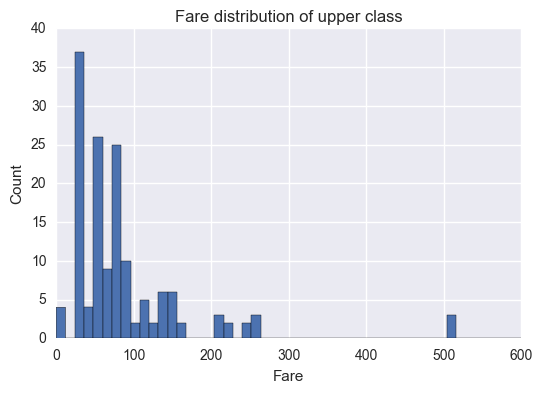

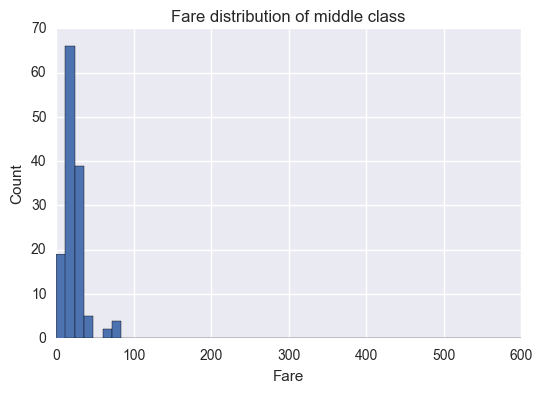

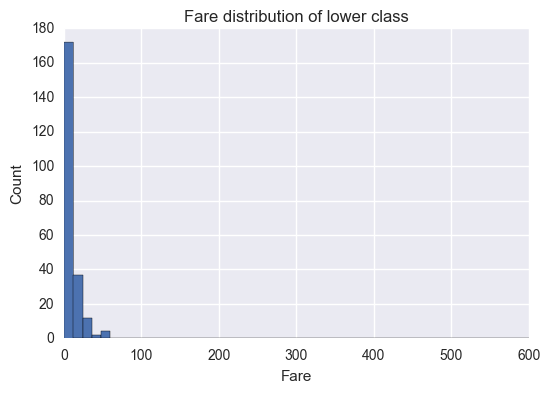

In [27]:
plot_class(Upper_df, 'upper')
plot_class(Middle_df, 'middle')
plot_class(Lower_df, 'lower')

It is clear that upper class passengers pay much higher fare than middle and lower class. There is one value in upper class that seems like an outlier (>500). Although there could be extremely expensive first class tickets, it is somewhat unlikely because all other values are below 300. Given that there are 513 passengers in total, the effect of this outlier on overall results would be little. Therefore, I will not remove it in my analysis. 

I will now calculate the survival rate for different sexes and classes. 

In [28]:
survival_per_class_sex= adult_df.groupby(['Pclass','Sex'])['Survived'].count()
print survival_per_class_sex

Pclass  Sex   
1       female     69
        male       82
2       female     58
        male       77
3       female     54
        male      173
Name: Survived, dtype: int64


In [29]:
pd1 = female_df.groupby('Pclass')['Survived'].mean()
pd2 = male_df.groupby('Pclass')['Survived'].mean()
data = {'female':pd1,'male':pd2}
class_sex_df = pd.DataFrame(data)
class_sex_df = class_sex_df.transpose()
print class_sex_df

Pclass         1         2         3
female  0.971014  0.896552  0.407407
male    0.426829  0.051948  0.132948


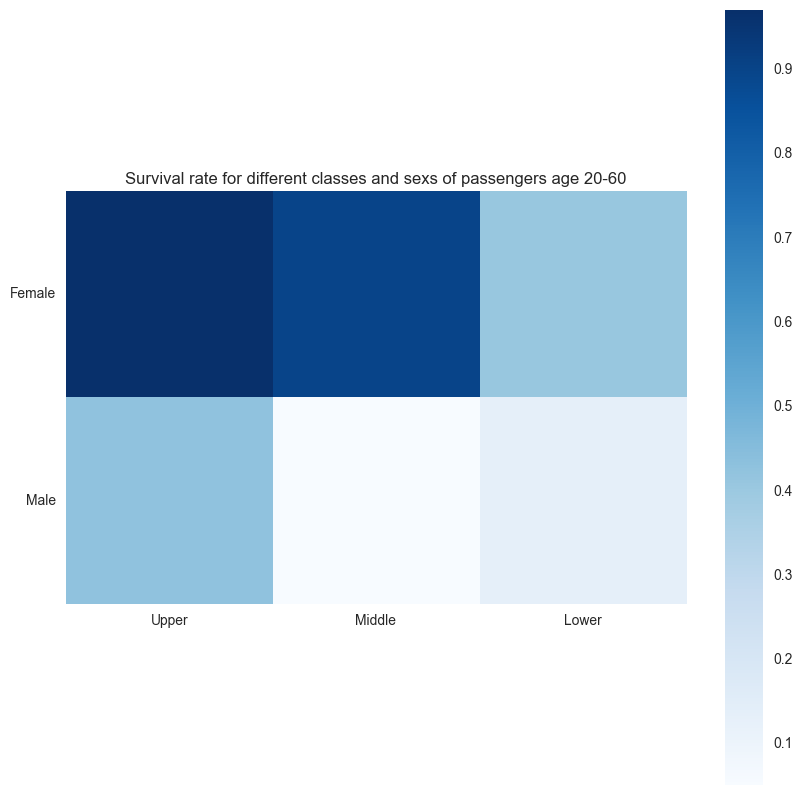

In [30]:
heatmap = class_sex_df #date from dataframe
plt.figure(figsize = (10,10))

plt.imshow(heatmap, cmap=plt.cm.Blues, interpolation='nearest') #color scheme is gray scale

plt.title('Survival rate for different classes and sexs of passengers age 20-60')
plt.xticks(range(3),['Upper','Middle','Lower'])
plt.yticks(range(2),['Female','Male'])
plt.grid(False)


plt.colorbar()

This heatmap shows that upper class female adult passengers age 20-60 have the highest survival rate of 97%, while middle class and lower class male passengers have low survival rate below 20%.

## 3. Conclusion

In conclusion, I report that passengers with higher socio-economic status and higher fares are more likely to survive. This may be related to the cabin equipment, location, safety setup, rescue priority.

The demographic features of survived passengers show 

1) children age 0-10 have the highest survival rate, and children with more siblings have lower survival rate. To further investigate whether parents tend to sacrifice themselves for the life of their children, whether they tend to die together with children, or whether they tend to live together with children, we could look at the Name column and check whether there is any correlation in the lastnames of children and adults survived or non survived. 

2) people older than 60 have the lowest survival rate. Inspired by one of the scenes in the movie Titanic in which an old coupld cuddled and died together, I'd like to further investigate whether couples would die together and whether this is age dependent.

3) female passengers have higher survival rate than male. And I would like to further explore whether single women or married women have a higher survival rate, and whether husbands tend to sacrifice themselves for their wifes. 

These findings conclude that children and upper class female are more likely to survive in Titanic.

Limitation: There were 2224 passengers on Titanic and only 891 passengers records are available in this dataset. Depending on how the data was collected, the concludion drawn from the sample may not represent the population and may have survival bias. 

## 4. References

1) https://docs.scipy.org/doc/scipy/reference/stats.html
2) http://stackoverflow.com/questions/13404468/t-test-in-pandas-python
3) http://stackoverflow.com/questions/3100985/plot-with-custom-text-for-x-axis-points
4) http://matplotlib.org/users/pyplot_tutorial.html
5) http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
6) http://pandas.pydata.org/pandas-docs/stable/missing_data.html
7) http://stackoverflow.com/questions/16947336/binning-a-dataframe-in-pandas-in-python
8) http://matplotlib.org/examples/ticks_and_spines/spines_demo_dropped.html